# Image Preprocessor 1 – Image Transformation.

This notebook is an introduction to some skills of image preprocess, more precisely, image transformation. Here, we cover

- Translation
- Rotation
- Resizing
- Flipping
- Cropping

## Importing Libraries

In [1]:
import cv2
import imutils
import numpy as np
import matplotlib.pyplot as plt

## Loading image from disk


In [2]:
img = cv2.imread("images/gil.jpg")

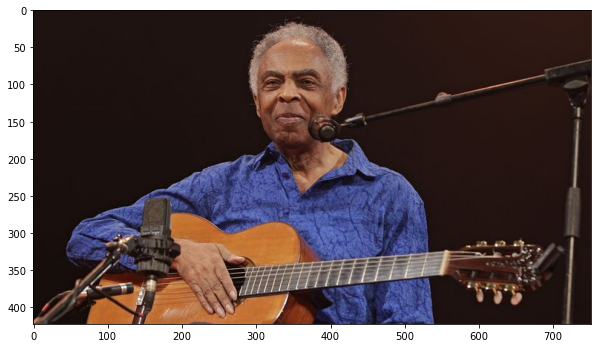

In [4]:
plt.figure(figsize=(10, 15))
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

### Image Translation

Translation shifts the images along the axis x and y, moving up, down or
both.

**Translation**

To translate any image, we must do two essentials things. First, define a translation Matrix. Second, apply the **cv2.warpAffine** function.

The transalation matrix must be a float point. We have two list (rows). The first list contains the range [1, 0, tx], where tx is the number of pixels to be shifted. Negatives values of tx shift to left and, positives values shift to right. The second list is [ 0, 1, ty]. Negative values of ty shift up, positives values of ty shift down.

For better understanding about the warpAffine, [see](https://docs.opencv.org/3.4/d4/d61/tutorial_warp_affine.html).

In [16]:
# Shift down and right (positive tx, positive ty)
M = np.float32([[1, 0, 25], [0, 1, 50]])
shifted_rd = cv2.warpAffine(img, M, (img.shape[1], img.shape[0]))
#shift up and left
M = np.float32([[1, 0, -50], [0, 1, -90]])
shifted_lu = cv2.warpAffine(img, M, (img.shape[1], img.shape[0]))

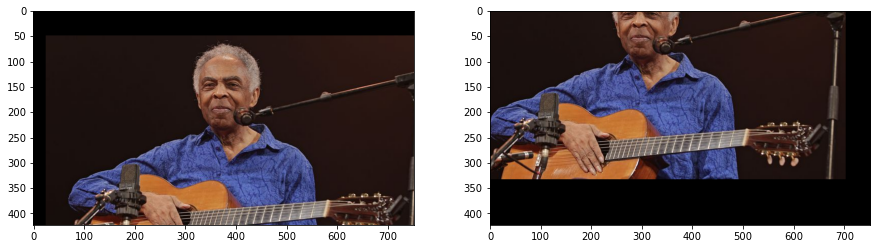

In [17]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
plt.title
plt.imshow(cv2.cvtColor(shifted_rd, cv2.COLOR_BGR2RGB))
plt.subplot(2,2,2)
plt.imshow(cv2.cvtColor(shifted_lu, cv2.COLOR_BGR2RGB))
plt.show()